# Homework 2 Part 3

## Mohammed Oubia

## Clustering with PCA


The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional
datapoints to 2 or 3 dimensions. In particular, consider the dataset MNIST provided on Virtuale. This
dataset contains images of handwritten digits with dimension 28 × 28, together with a number from 0 to 9
representing the label. You are asked to:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


• Load the dataset in memory and explore its head and shape to understand how the informations are
placed inside of it;

In [13]:
# Load data into memory
data = pd.read_csv('data.csv')
# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
data.head()


Shape of the data: (42000, 785)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


• Split the dataset into the X matrix of dimension d × N, with d = 784 being the dimension of each
datum, N is the number of datapoints, and Y ∈ R
N containing the corresponding labels;

In [14]:
data=np.array(data)
print(data.shape)
Y=data[:,0]
X=data[:,1:]
X=X.T
print(f"Shape of X : {X.shape}")
print(f"Shape of Y : {Y.shape}")

(42000, 785)
Shape of X : (784, 42000)
Shape of Y : (42000,)


In [19]:
def split_data(X, Y, Ntrain):
    d, N = X.shape
    np.random.seed(42)
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]
    Xtrain = X[:, train_idx]
    print(Y.shape)
    Ytrain = Y[train_idx]
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]
    return (Xtrain, Ytrain), (Xtest, Ytest)
# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, int(X.shape[1]*0.7))
print(Xtrain.shape, Ytrain.shape)

(13262,)
(784, 9283) (9283,)


In [20]:
def three_idx_data(X,Y,idx1,idx2,idx3):
    idx_123=[i for i in range(len(Y)) if Y[i] in (idx1,idx2,idx3)]
    return X[:,idx_123],Y[idx_123]

• Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset
containing only the considered digits. Re-call X and Y those datasets, since the originals are not
required anymore;

In [21]:
idx1=1
idx2=7
idx3=2
X,Y=three_idx_data(X,Y,idx1,idx2,idx3)
print(f"Shape of X : {X.shape}")
print(f"Shape of Y : {Y.shape}")

Shape of X : (784, 13262)
Shape of Y : (13262,)


• Implement the algorithms computing the PCA of Xtrain with a fixed k. Visualize the results (for
k = 2) and the position of the centroid of each cluster;


In [22]:
def centroid(X):
    return np.mean(X,axis=1,keepdims=True)

print(centroid(Xtrain).shape)
Cx=centroid(Xtrain)
Xc=(Xtrain-Cx)
print(np.linalg.norm(centroid(Xc),2))
print(np.mean(Xc))
print(Xc.shape)

(784, 1)
1.3897050268818118e-12
5.3485927254397064e-17
(784, 9283)


In [24]:
def calculateCentroidCluster(X,k):
    C=centroid(X)
    Xc=(X-C)
    U,s,VT=np.linalg.svd(Xc,full_matrices=False)
    U_k=U[:, :k]
    Z_k=U_k.T @ Xc
    return Z_k
 
def calculateCenteredDataset(X):
    C=centroid(X)
    return X-C

def plotCluster_2d(X,Y,idx1,idx2,idx3):
    Z_k=calculateCentroidCluster(Xtrain,2)
    idex1 = Y[:] == idx1
    idex2 = Y[:] == idx2
    idex3 = Y[:] == idx3
    Z_k1 = Z_k[:, idex1]
    Z_k2 = Z_k[:, idex2]
    Z_k3 = Z_k[:, idex3]
    C_k1 = np.reshape(np.mean(Z_k1,axis=1),(2,1))
    C_k2 = np.reshape(np.mean(Z_k2,axis=1),(2,1))
    C_k3 = np.reshape(np.mean(Z_k3,axis=1),(2,1))
    plt.scatter(Z_k[0,:], Z_k[1,:], c=Ytrain[:])
    plt.scatter(C_k1[0,:], C_k1[1,:],c = "r", marker='x')
    plt.scatter(C_k2[0,:], C_k2[1,:],c = "r", marker='x')
    plt.scatter(C_k3[0,:], C_k3[1,:],c = "r", marker='x')
    plt.grid()
    plt.show()
 
 
def plotCluster_3d(X,Y,idx1,idx2,idx3):
    Z_k=calculateCentroidCluster(X,3)
    idex1 = Y[:] == idx1
    idex2 = Y[:] == idx2
    idex3 = Y[:] == idx3
    Z_k1 = Z_k[:, idex1]
    Z_k2 = Z_k[:, idex2]
    Z_k3 = Z_k[:, idex3]
    C_k1 = np.reshape(np.mean(Z_k1,axis=1),(3,1))
    C_k2 = np.reshape(np.mean(Z_k2,axis=1),(3,1))
    C_k3 = np.reshape(np.mean(Z_k3,axis=1),(3,1))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(C_k2[0,:], C_k2[1,:],C_k2[2,:],s=100,c = "r", marker='x')
    ax.scatter(C_k3[0,:], C_k3[1,:],C_k3[2,:],s=100,c = "r", marker='x')
    ax.scatter(C_k1[0,:], C_k1[1,:],C_k1[2,:],s=300,c = "r", marker='x')
    plt.show()
    fig2 = plt.figure()
    ax2= fig2.add_subplot(111, projection='3d')
    ax2.scatter(Z_k[0, :], Z_k[1, :], Z_k[2,:],c=Y,zorder=0)
    plt.show()

• Compute, for each cluster, the average distance from the centroid. Comment the result;

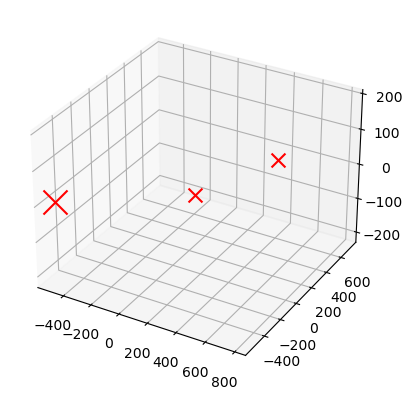

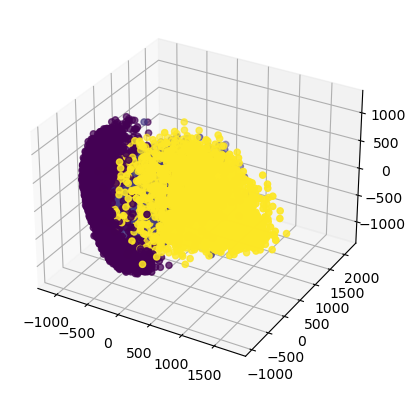

In [25]:
plotCluster_3d(Xtrain,Ytrain,idx1,idx2,idx3)

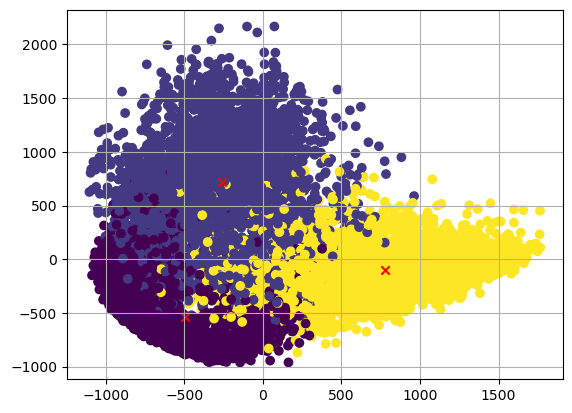

In [26]:
plotCluster_2d(Xtrain,Ytrain,idx1,idx2,idx3)

In [27]:
def Xcx(X,Y,idx):
    Xc=calculateCenteredDataset(X)
    idx1=Y[:]==idx
    return Xc[:,idx1]

In [28]:
Xc1=Xcx(Xtrain,Ytrain,idx1)
Xc2=Xcx(Xtrain,Ytrain,idx2)
Xc3=Xcx(Xtrain,Ytrain,idx3)
distCluster1 = np.mean(np.linalg.norm((centroid(Xc1) - Xc1),2, axis=0))
print(distCluster1)
distCluster2 = np.mean(np.linalg.norm((centroid(Xc2) - Xc2),2, axis=0))
print(distCluster2)
distCluster3 = np.mean(np.linalg.norm((centroid(Xc3) - Xc3),2,axis=0))
print(distCluster3)
print(Xtest.shape)

1180.1890050320967
1537.369594919297
1805.7118982252568
(784, 3979)


In [29]:
Xc1_test=Xcx(Xtest,Ytest,idx1)
Xc2_test=Xcx(Xtest,Ytest,idx2)
Xc3_test=Xcx(Xtest,Ytest,idx3)
distCluster1 = np.mean(np.linalg.norm((centroid(Xc1) - Xc1_test),2, axis=0))
print(distCluster1)
distCluster2 = np.mean(np.linalg.norm((centroid(Xc2) - Xc2_test),2, axis=0))
print(distCluster2)
distCluster3 = np.mean(np.linalg.norm((centroid(Xc3) - Xc3_test),2,axis=0))
print(distCluster3)

1182.3697467856045
1548.0141282851143
1807.9207177017895


In [30]:
def classificationAlgo(Xc1,Xc2,Xc3,new_data,idx1,idx2,idx3):
    new_data=new_data.reshape(-1,1)
    dist1=np.linalg.norm(new_data-Xc1)
    dist2=np.linalg.norm(new_data-Xc2)
    dist3=np.linalg.norm(new_data-Xc3)
    minDist=min(dist1,dist2,dist3)
    if minDist==dist1:
        return idx1
    if minDist==dist2:
        return idx2
    if minDist==dist3:
        return idx3
contatore=0
C=[classificationAlgo(Xc1,Xc2,Xc3,Xtest[:,i],idx1,idx2,idx3) for i in range(len(Ytest))]
counter= sum(el1 == el2 for el1, el2 in zip(C, Ytest))
print(counter)
print(int(counter*100/len(Ytest)),"%")

3707
93 %


In [31]:
print(Xtest.shape)

(784, 3979)


Compare this classification algorithm with the one defined in the previous exercise. Which performs better?

## End